In [21]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  #显示中文
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.rcParams['figure.dpi'] = 300
%matplotlib inline
# %config InlineBackend.figure_format = 'svg'
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None) # 显示所有列
from tqdm.notebook import tqdm
import geopandas as gpd
import transbigdata as tbd
import geoplot as gplt

In [2]:
df_all = pd.read_csv('E:/Data/mobike201803/final_data.csv')

In [3]:
grid_m_list = np.append((np.linspace(100,900,9)),\
          np.linspace(1000,5000,9)) # 生成网格大小列表


res_df = []

for sample_rate in range(2,21):
    for grid_m in grid_m_list:

        df = df_all[(df_all['samp_rate']==sample_rate) & (df_all['grid_m']==grid_m)]
        # 计算线性回归的系数
        X = df.loc[:, 'generate_trip_num']
        X = sm.add_constant(X) 
        y = df.loc[:, 'real_trip_num']
        model = sm.OLS(y, X,hasconst=True).fit()
        # 保存结果
        res_df.append([sample_rate,grid_m,model.params[1],model.params[0]]) # 分别为采样率、网格大小、斜率、截距


In [14]:
df = pd.DataFrame(res_df,columns=['sample_rate','grid_m','slope','intercept'])

In [15]:
df

,sample_rate,grid_m,slope,intercept
0,2,100.0,1.126564,-0.759706
1,2,200.0,1.103686,-1.928748
2,2,300.0,1.087813,-2.625929
3,2,400.0,1.079042,-2.996583
4,2,500.0,1.073165,-2.952613
...,...,...,...,...
337,20,3000.0,2.663430,-305.386078
338,20,3500.0,2.675249,-450.883488
339,20,4000.0,2.665175,-504.229800
340,20,4500.0,2.680069,-750.443883


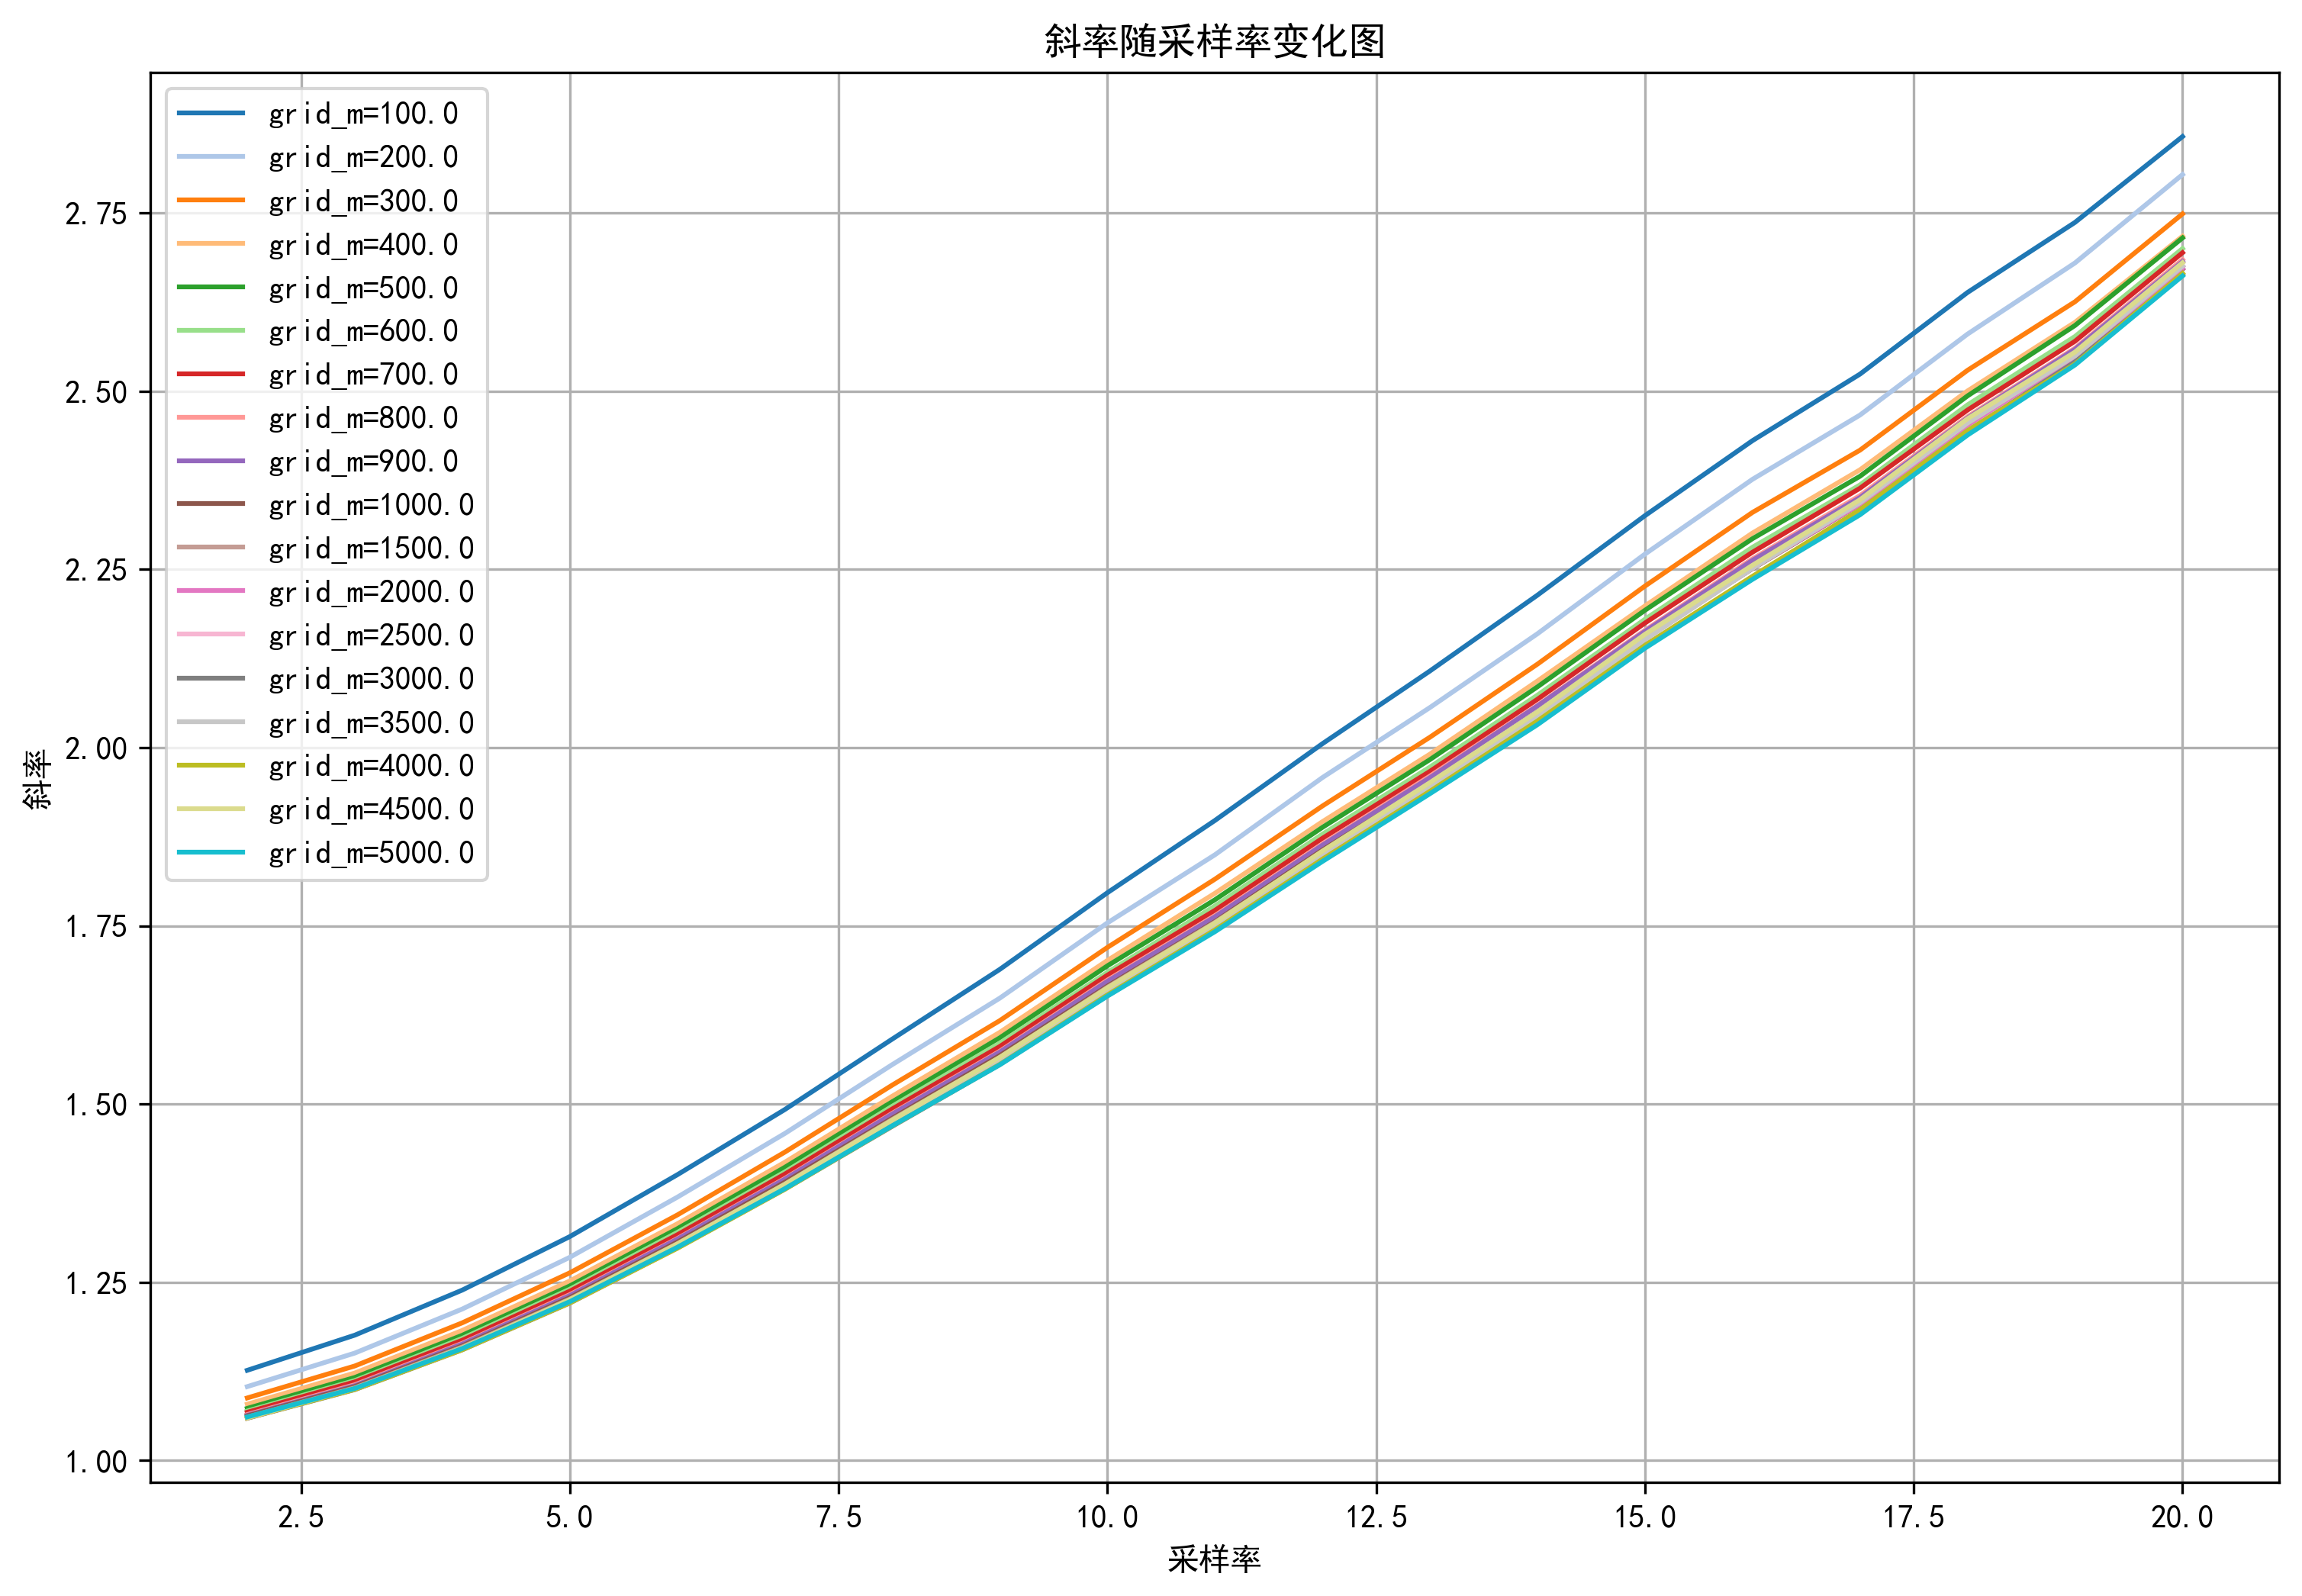

In [23]:
cmap = plt.get_cmap('tab20')
colors = [cmap(i) for i in np.linspace(0, 1, 19)]
fig, ax = plt.subplots(1,1,figsize=(12, 8)) # 可使用GridSpec用法
for grid_m,color_grid in zip(df.grid_m.unique(),colors):
    df_temp = df[df['grid_m']==grid_m]

    ax.plot(df_temp['sample_rate'],df_temp['slope'],color=color_grid,label='grid_m={}'.format(grid_m))
    ax.set_xlabel('采样率')
    ax.set_ylabel('斜率')
    ax.legend()
    ax.set_title('斜率随采样率变化图')
    ax.grid(True)
plt.savefig('C:/Users/yongqi/Desktop/斜率随采样率变化图.jpg',dpi=300)

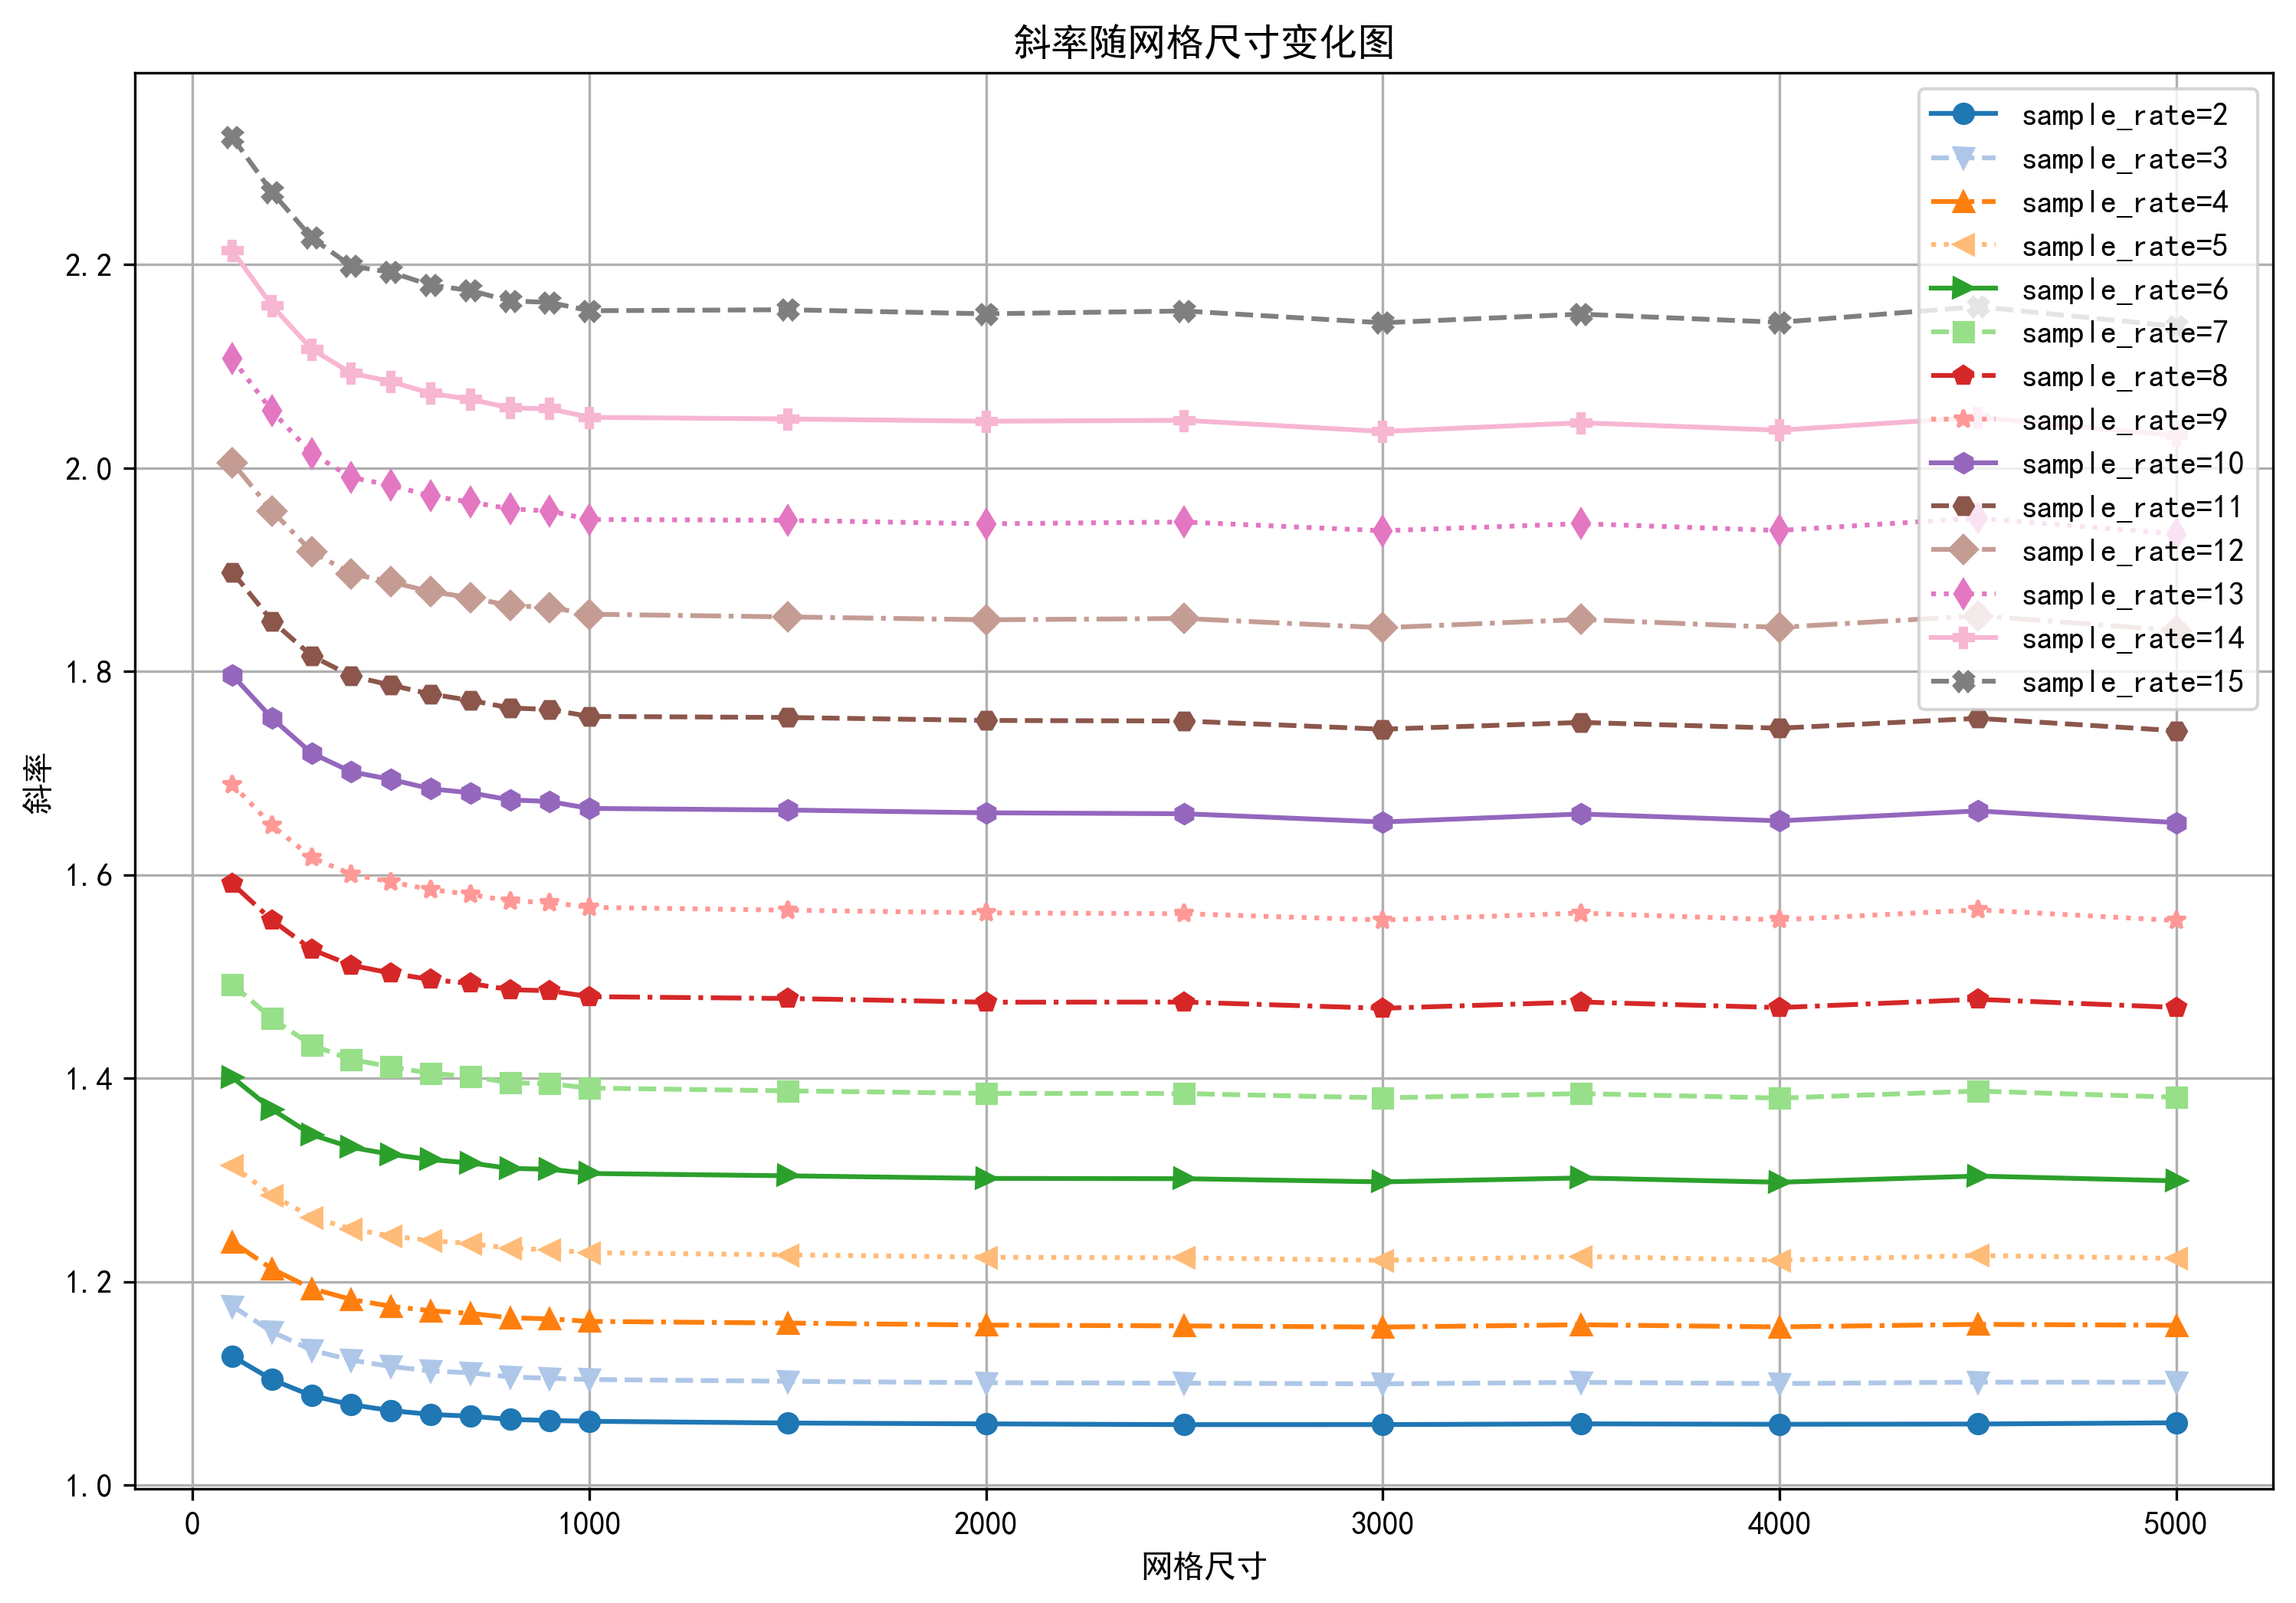

In [33]:
cmap = plt.get_cmap('tab20')
colors = [cmap(i) for i in np.linspace(0, 1, 19)]
line_styles = ['-', '--', '-.', ':']
markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']
fig, ax = plt.subplots(1,1,figsize=(12, 8)) # 可使用GridSpec用法
for sample_rate,color_sample,line_style,marker in zip(df.sample_rate.unique(),colors,line_styles*5,markers):
    df_temp = df[df['sample_rate']==sample_rate]

    ax.plot(df_temp['grid_m'],df_temp['slope'],color=color_sample,marker=marker,linestyle=line_style,label='sample_rate={}'.format(sample_rate))
ax.set_xlabel('网格尺寸')
ax.set_ylabel('斜率')
ax.set_title('斜率随网格尺寸变化图')
ax.grid(True)
# 设置lengend的位置
plt.legend(loc='upper right')
plt.savefig('C:/Users/yongqi/Desktop/斜率随网格尺寸变化图.jpg',dpi=300)

In [10]:
df_temp = df[df['grid_m']==1000]
df_temp

,sample_rate,grid_m,slope,intercept
9,2,1000.0,1.062683,0.231716
27,3,1000.0,1.103766,-5.223899
45,4,1000.0,1.160910,-12.359879
63,5,1000.0,1.228423,-18.679529
81,6,1000.0,1.306382,-23.628450
99,7,1000.0,1.390364,-28.594866
117,8,1000.0,1.480223,-33.109259
135,9,1000.0,1.568078,-35.010722
153,10,1000.0,1.665340,-38.177624
171,11,1000.0,1.755852,-38.669379
